## Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Import data
# data = pd.read_csv('../data/processed_trips_2018.csv')
stations = pd.read_csv("/Users/alexnaderspude/Desktop/Desktop/TUM MMT/DTU Kurs/Group Project/Trips_2018.csv")

In [8]:
# Basic info
stations.info()      # structure: columns + dtypes + non-null counts

# Table view of the first rows
stations.head().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548339 entries, 0 to 17548338
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   tripduration             int64  
 2   starttime                object 
 3   stoptime                 object 
 4   start_station_id         float64
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_latitude     float64
 9   end_station_longitude    float64
 10  bikeid                   int64  
 11  usertype                 object 
 12  birth_year               int64  
 13  gender                   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 1.8+ GB


,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
tripduration,970,723,496,306,306
starttime,2018-01-01 13:50:57.4340,2018-01-01 15:33:30.1820,2018-01-01 15:39:18.3370,2018-01-01 15:40:13.3720,2018-01-01 18:14:51.5680
stoptime,2018-01-01 14:07:08.1860,2018-01-01 15:45:33.3410,2018-01-01 15:47:35.1720,2018-01-01 15:45:20.1910,2018-01-01 18:19:57.6420
start_station_id,72.0,72.0,72.0,72.0,72.0
start_station_latitude,40.767272,40.767272,40.767272,40.767272,40.767272
start_station_longitude,-73.993929,-73.993929,-73.993929,-73.993929,-73.993929
end_station_id,505.0,3255.0,525.0,447.0,3356.0
end_station_latitude,40.749013,40.750585,40.755942,40.763707,40.774667
end_station_longitude,-73.988484,-73.994685,-74.002116,-73.985162,-73.984706


## Clustering

In [10]:
def plot_station_clusters(df):
    n_clusters = len(set(df["station_cluster"]))
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.scatterplot(data=df, x='start_station_longitude', y='start_station_latitude', hue='station_cluster', palette='tab20', ax=ax)
    ax.set_title(f'Station Clusters (n={n_clusters})')
    plt.show()


/opt/anaconda3/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


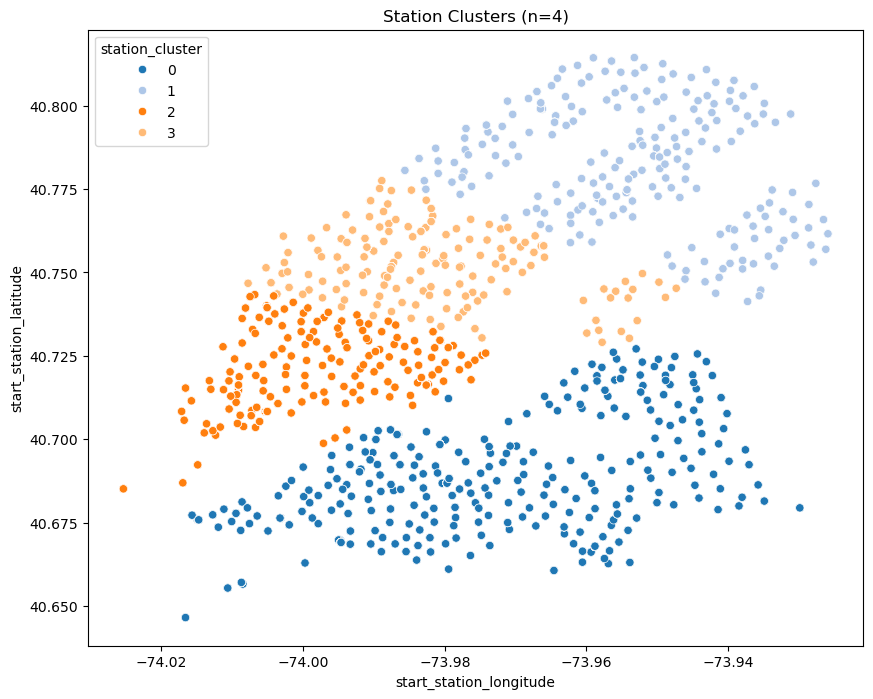

In [19]:
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans

# 1. Remove spatial outliers based on z-scores of lat/long
coords = stations[['start_station_latitude', 'start_station_longitude']]

z_scores = np.abs(stats.zscore(coords))          # z-score for each point in both dims
mask_no_outliers = (z_scores < 3).all(axis=1)    # keep only points with |z| < 3 in BOTH dims

stations_clean = stations[mask_no_outliers].copy()

# 2. Run KMeans on the cleaned data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(stations_clean[['start_station_latitude', 'start_station_longitude']])

stations_clean['station_cluster'] = kmeans.labels_

# 3. Plot clusters (using your existing helper)
plot_station_clusters(stations_clean)


In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

LAT_COL = 'start_station_latitude'
LON_COL = 'start_station_longitude'

# 1. Keep only rows with valid coordinates
coords = stations[[LAT_COL, LON_COL]].dropna().copy()

# 2. Run K-Means clustering
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
coords_sample['cluster'] = kmeans.fit_predict(coords_sample[[LAT_COL, LON_COL]])

# 3. Plot clusters with a legend (no colorbar)
plt.figure(figsize=(8, 6))

cmap = plt.cm.get_cmap('tab10', k)

for c in range(k):
    mask = coords_sample['cluster'] == c
    plt.scatter(
        coords_sample.loc[mask, LON_COL],
        coords_sample.loc[mask, LAT_COL],
        color=cmap(c),
        s=10,
        alpha=0.7,
        label=f'Cluster {c+1}'
    )

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Station clusters based on location (k={k})')

# Legend to the right of the plot
plt.legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()


NameError: name 'coords_sample' is not defined

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# plot k-means for up to 20 clusters
fig, ax = plt.subplots(5, 4, figsize=(20, 25))

for n_clusters in range(1, 21):          # will give 1..20 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(stations[['start_station_latitude', 'start_station_longitude']])
    stations['station_cluster'] = kmeans.labels_

    r = (n_clusters - 1) // 4
    c = (n_clusters - 1) % 4

    sns.scatterplot(
        data=stations,
        x='start_station_longitude',
        y='start_station_latitude',
        legend=False,
        hue='station_cluster',
        palette='tab20',
        ax=ax[r, c]
    )
    ax[r, c].set_title(f'Station Clusters (k={n_clusters})')

plt.tight_layout()
plt.show()



KeyboardInterrupt: 

In [27]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.006, min_samples=10)
dbscan.fit(stations[['start_station_latitude', 'start_station_longitude']])
stations['station_cluster'] = dbscan.labels_
plot_station_clusters(stations)

: 

In [ ]:
fig, ax = plt.subplots(5, 4, figsize=(20, 25))
for i in range(1, 21):
    eps = 0.002+0.0003*i
    dbscan = DBSCAN(eps=eps, min_samples=10)
    dbscan.fit(stations[['station_latitude', 'station_longitude']])
    stations['station_cluster'] = dbscan.labels_
    sns.scatterplot(data=stations, x='station_longitude', y='station_latitude', legend="full", hue='station_cluster', palette='tab20', ax=ax[(i-1)//4, (i-1)%4])
    ax[(i-1)//4, (i-1)%4].set_title(f'Station Clusters (eps={eps})')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# plot k means for up to 20 clusters
fig, ax = plt.subplots(5, 4, figsize=(20, 25))
for n_clusters in range(1, 21):
    agglo = AgglomerativeClustering(n_clusters=n_clusters+20)
    agglo.fit(stations[['station_latitude', 'station_longitude']])
    stations['station_cluster'] = agglo.labels_
    sns.scatterplot(data=stations, x='station_longitude', y='station_latitude', legend=False, hue='station_cluster', palette='tab20', ax=ax[(n_clusters-1)//4, (n_clusters-1)%4])
    ax[(n_clusters-1)//4, (n_clusters-1)%4].set_title(f'Station Clusters (n={n_clusters+20})')